In [230]:
import numpy as np
from skimage import io, transform

from tracking import *

ARUCO_DICT = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)

In [257]:
def drawAxes(frame, camera_matrix, dist_coeffs):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    # Define the aruco dictionary and charuco board
    parameters = cv2.aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(ARUCO_DICT, parameters)
    rvec, tvec = None, None
    print(f'type of gray img is {type(gray)}')
    # lists of ids and the corners beloning to each id
    corners, ids, rej = detector.detectMarkers(image=gray)    # ignore rejected points in image
    print(f'number of rejected points is {len(rej)}')
    print(f'rejected points are {rej}')
    if np.all(ids is not None):  # If there are markers found by detector
        for i in range(0, len(ids)):  # Iterate in markers
            # estimate pose of each marker 
            rvec, tvec, markerPoints = my_estimatePoseSingleMarkers(corners[i], 0.02, camera_matrix, dist_coeffs)
            # print(rad_to_deg(rvec))
            aruco.drawDetectedMarkers(frame, corners, borderColor=(255,0,0))  # Draw A square around the markers
            # aruco.DrawFrameAxes(frame, matrix_coefficients, distortion_coefficients, rvec, tvec, 0.01)  # Draw Axis
            rvec = np.array(rvec)
            tvec = np.array(tvec)
            frame = cv2.drawFrameAxes(frame, camera_matrix, dist_coeffs, rvec, tvec,0.03)
    return frame, rvec, tvec

In [258]:
def scale_image(image, scale_factor):
    print(f'scaling by {scale_factor}...')
    print('original shape is', image.shape)
    result = transform.rescale(image, scale_factor, channel_axis = 2)
    print('final shape is', result.shape)
    return result

In [259]:
camera_matrix = np.load('cam_properties/camera_matrix.npy')
dist_coeffs = np.load('cam_properties/dist_coeffs.npy')

In [260]:
from PIL import Image

def convert_jpg_to_png(jpg_path, png_path):
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')


In [261]:
# fileaddress = 'images/pres1.png'

fileaddress = 'images/cdr_ball.png'

# convert_jpg_to_png(fileaddress, 'images/pres2.png')

frame = io.imread(fileaddress)
# frame = scale_image(frame, 0.25)
frame=frame/255.0 if np.max(frame) > 1.0 else frame
print('frame range is', np.min(frame), 'to', np.max(frame))
print('type is', type(frame))

frame range is 0.0 to 1.0
type is <class 'numpy.ndarray'>


In [262]:
frame = np.array(frame*255, dtype=np.uint8)

frame shape is (2048, 1536, 3)


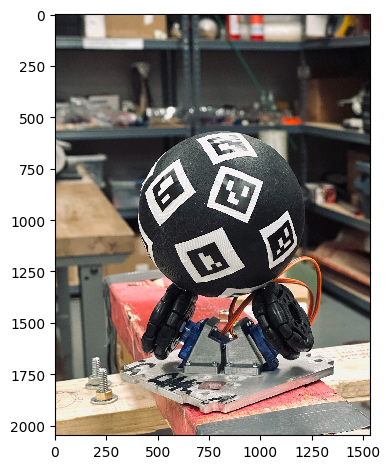

In [263]:
print('frame shape is', frame.shape)
io.imshow(frame)

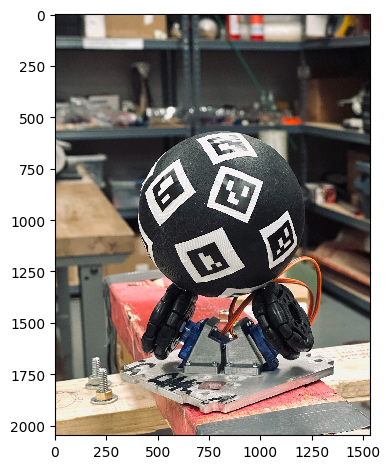

In [264]:
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale)
io.imshow(frame)


In [265]:
out, rvec, tvec = drawAxes(frame, camera_matrix, dist_coeffs)


type of gray img is <class 'numpy.ndarray'>
number of rejected points is 34
rejected points are (array([[[ 616.,  684.],
        [ 702.,  867.],
        [ 528., 1062.],
        [ 412.,  897.]]], dtype=float32), array([[[1133.,  949.],
        [1179., 1140.],
        [1044., 1251.],
        [ 988., 1050.]]], dtype=float32), array([[[1013., 1462.],
        [1039., 1513.],
        [1009., 1535.],
        [ 985., 1473.]]], dtype=float32), array([[[ 645., 1764.],
        [ 610., 1789.],
        [ 560., 1788.],
        [ 629., 1760.]]], dtype=float32), array([[[ 321., 1604.],
        [ 329., 1614.],
        [ 332., 1686.],
        [ 320., 1673.]]], dtype=float32), array([[[922., 830.],
        [946., 846.],
        [928., 893.],
        [902., 881.]]], dtype=float32), array([[[847., 805.],
        [872., 815.],
        [854., 862.],
        [828., 851.]]], dtype=float32), array([[[242., 869.],
        [275., 903.],
        [286., 927.],
        [275., 924.]]], dtype=float32), array([[[550., 

In [266]:
print(f'shape fo rvec is {rvec.shape} and tvec is {tvec.shape}')
rvec

shape fo rvec is (1, 3, 1) and tvec is (1, 3, 1)


array([[[ 3.27659891],
        [ 0.62693703],
        [-0.05770352]]])

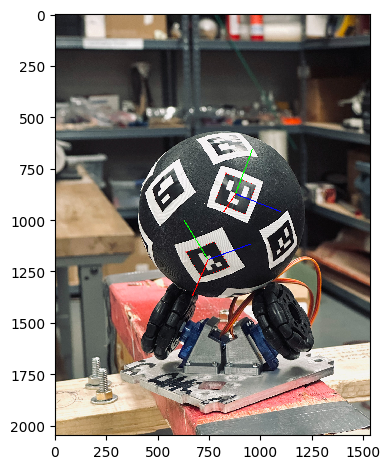

In [267]:
io.imshow(out)
io.imsave('output/' + fileaddress.split('/')[-1].split('.')[0] + '_axes.png', out)